### Sklearn实现SVM

In [56]:
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import matplotlib as mpl

In [57]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [58]:
X,y = loadDataSet('data/svm1.txt')

In [59]:
model = LinearSVC(C=1)
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [60]:
b=model.intercept_
w = model.coef_
print('b=',b)
print('w=',w)

b= [-3.63697454]
w= [[ 0.7772063 -0.2644913]]


### 画图

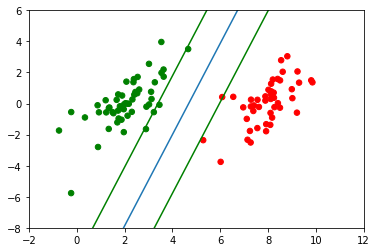

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)
#画决策平面
x0 = np.arange(-2.0, 12.0, 0.1)
x1 = (-w[0][0]*x0 - b)/w[0][1]
ax.plot(x0,x1.reshape(-1,1))

#画间隔平面
pos0 = np.arange(-2.0, 12.0, 0.1)
pos1 = (1-w[0][0]*pos0 - b)/w[0][1]
ax.plot(pos0,pos1.reshape(-1,1),color="green")

neg0 = np.arange(-2.0, 12.0, 0.1)
neg1 = (-1-w[0][0]*neg0 - b)/w[0][1]
ax.plot(neg0,neg1.reshape(-1,1),color="green")

ax.axis([-2,12,-8,6])
plt.show()